<a href="https://colab.research.google.com/github/nicolasbini/tps-pod-nico-bini/blob/main/Copia_de_POD_05_POO_Individual_TEMPLATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   **Año:** [2024]
*   **Alumno/a:** [Nicolas Bini]
*   **Legajo:** [LEGAJO]

Desarrollar las clases y tests (con Python base, realizar assertions con Python, sin librerias) necesarias en los siguientes ejercicios. **Importante: no se pueden usar condicionales a lo largo de todo el trabajo práctico.**

# MobyCafé
MobyCafé quiere pasar de la facturación manual a la facturación automática. Ellos venden café de grano donde el cliente puede personalizar el pedido a gusto. No hay americano, no hay cortado... es lo que el cliente quiere agregarle a un café base que salé ya $15.

Los clientes pueden pedir entre 3 vasos distintos: chico (5 pesos), mediano (7 pesos), y grande (10 pesos). Por lo tanto, si, por ejemplo, el cliente pide cafe en un vaso mediano le va a salir de base 22 pesos (15 pesos + 7 pesos). Tienen una gran variedad de ingredientes que se le puede agregar al café, pero ellos dejaron en claro que hay 5 ingredientes que hay que incorporar sí o sí al sistema que son chocolate (7 pesos), caramelo (12 pesos), crema (10 pesos), rocklets (15 pesos), y azúcar (1 pesos). También, debería haber un feature que deje hacer un print del resumen del precio de un café (esto no es necesario que tenga un test unitario correspondiente ya que es gráfico).

Cree las clases para atacar el problema:

In [ ]:
class Cafe:
  # el cafe puede tener un solo tamanio y varios ingredienes a la vez
  # si el cafe no no contiene ningun ingrediente entonces la lista de ingredientes estara vacia
  def __init__(self, tamanio, ingredientes=None):
    self.tamanio = tamanio
    self.ingredientes = ingredientes or []

  def precio_tamanio(self):
    precios_tamanio = {
        'chico': 5,
        'mediano': 7,
        'grande': 10,
    }
    return precios_tamanio.get(self.tamanio)

  def precio_ingrediente(self):
    precios_ingredientes = {
        'chocolate': 7,
        'caramelo': 12,
        'crema': 10,
        'rocklets': 15,
        'azucar': 1,
    }

    # sumo el precio de todos los ingredientes que aparecen en el pedido
    total = 0
    for ingrediente in self.ingredientes:
      total += precios_ingredientes.get(ingrediente)
    return total

  def precio_final(self):
    # el precio inicial es 15
    return 15 + self.precio_tamanio() + self.precio_ingrediente()

  def resumen(self):
    if self.ingredientes:
      ingredientes = ', '.join(self.ingredientes) # agregar ingredientes
    else:
      ingredientes = 'sin ingredientes'

    # este imprime mal el texto porque devuelve una tupla
    #return 'Cafe:', self.tamanio, 'con', ingredientes, '\nPrecio final:',self.precio_final()

    # hay que usar este formato
    return f"Café tamaño {self.tamanio} con {ingredientes}\nPrecio final: ${self.precio_final()}"

In [ ]:
tamanio = 'chico'
ingredientes = ['azucar', 'crema']
pedido = Cafe(tamanio,ingredientes)
print(pedido.resumen())

tamanio = 'mediano'
ingredientes = ['rocklets']
pedido = Cafe(tamanio,ingredientes)
print(pedido.resumen())

tamanio = 'grande'
ingredientes = []
pedido = Cafe(tamanio,ingredientes)
print(pedido.resumen())

Café tamaño chico con azucar, crema
Precio final: $31
Café tamaño mediano con rocklets
Precio final: $37
Café tamaño grande con sin ingredientes
Precio final: $25


Escriba al menos 5 tests y que estos pasen.

In [ ]:
def cafe_chico_sin_ingredientes():
    pedido = Cafe('chico', [])
    assert pedido.precio_final() == 20

def cafe_mediano_con_azucar():
    pedido = Cafe('mediano', ['azucar'])
    assert pedido.precio_final() == 23

def cafe_grande_con_ingredientes():
    pedido = Cafe('grande', ['chocolate', 'crema', 'rocklets'])
    assert pedido.precio_final() == 57

def cafe_mediano_con_ingredientes():
    pedido = Cafe('mediano', ['caramelo', 'crema', 'azucar'])
    assert pedido.precio_final() == 45

def cafe_chico_con_ingrdientes():
    pedido = Cafe('chico', ['rocklets', 'crema'])
    assert pedido.precio_final() == 45

# Piedra, papel, o tijera ... ¿o algo mas?

P.P.T. es un juego AAA mundialmente conocido y online que permite jugar al “Piedra, Papel o Tijera”. Es uno de los juegos más exitosos del mundo y tiene una vasta cantidad de torneos. Dentro la empresa del juego, están pensando agregar un DLC que permita jugar a la versión del programa Star-Trek del “Piedra, Papel o Tijera” que se llama “Piedra, Papel, Tijera, Lizard, o Spock”. Las reglas del juego se pueden mostrar gráficamente:

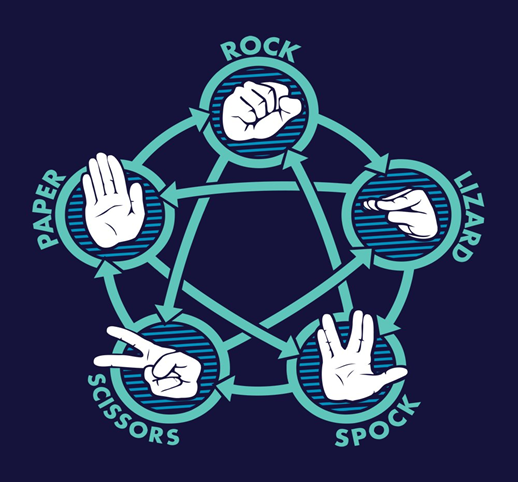

Aclaración: Spock es la mano que forma la ‘v’ y Lizard es la mano plana. La flecha indica a qué jugada le gana a cuál.

Nota: Primero, desarrollar “Piedra, Papel o Tijera” con la restricción dada. Luego, modificar el desarrollo para agregar las jugadas que faltan.


Cree las clases para atacar el problema:

In [ ]:
# el juego se basa en relaciones entre los movimientos (nodos) como un grafo

class Rock:
    def __init__(self):
        self.name = 'Rock'

    def win(self, other):
        return (other.name == 'Scissors') | (other.name == 'Lizard')

    def lose(self, other):
        return (other.name == 'Paper') | (other.name == 'Spock')

    # si empatan
    def draw(self, other):
        return self.name == other.name

class Lizard:
    def __init__(self):
        self.name = 'Lizard'

    def win(self, other):
        return (other.name == 'Paper') | (other.name == 'Spock')

    def lose(self, other):
        return (other.name == 'Rock') | (other.name == 'Scissors')

    def draw(self, other):
        return self.name == other.name


class Spock:
    def __init__(self):
        self.name = 'Spock'

    def win(self, other):
        return (other.name == 'Rock') | (other.name == 'Scissors')

    def lose(self, other):
        return (other.name == 'Paper') | (other.name == 'Lizard')

    def draw(self, other):
        return self.name == other.name

class Scissors:
    def __init__(self):
        self.name = 'Scissors'

    def win(self, other):
        return (other.name == 'Lizard') | (other.name == 'Paper')

    def lose(self, other):
        return (other.name == 'Spock') | (other.name == 'Rock')

    def draw(self, other):
        return self.name == other.name

class Paper:
    def __init__(self):
        self.name = 'Paper'

    def win(self, other):
        return (other.name == 'Rock') | (other.name == 'Spock')

    def lose(self, other):
        return (other.name == 'Lizard') | (other.name == 'Scissors')

    def draw(self, other):
        return self.name == other.name

In [ ]:
piedra = Rock()
tijera = Scissors()

def piedra_vs_tijera():
    assert piedra.win(tijera) == True
    assert tijera.lose(piedra) == True

piedra_vs_tijera()

Escriba al menos 5 tests y que estos pasen.

In [ ]:
def rock_vs_scissors():
    piedra = Rock()
    tijera = Scissors()

    assert piedra.win(tijera) == True
    assert tijera.lose(piedra) == True

def paper_vs_rock():
    papel = Paper()
    peidra = Rock()

    assert piedra.win(papel) == False
    assert papel.lose(piedra) == False


def scissors_vs_paper():
    tijera = Scissors()
    papel = Paper()

    assert tijera.win(papel) == True
    assert papel.win(tijera) == False

def lizard_vs_spock():
    lagarto = Lizard()
    spock = Spock()

    assert spock.lose(lagarto) == True
    assert lagarto.lose(spock) == False

def paper_vs_paper():
    papel_1 = Paper()
    papel_2 = Paper()

    assert papel_1.draw(papel_2) == True
    assert papel_1.win(papel_2) == False
    assert papel_1.lose(papel_2) == False

rock_vs_scissors()
paper_vs_rock()
scissors_vs_paper()
lizard_vs_spock()
paper_vs_paper()

# Banco Madrid

El Banco Madrid tiene un sistema de registro de cuentas corrientes desarrollado en COBOL. Como la industria se está migrando a Python, decidieron implementar el mismo sistema, pero en Python. Hasta ahora, la cuenta corriente permite hacer operaciones de depósito y extracción, pero, dependiendo del estado de la cuenta, se puede hacer ciertas operaciones y otras no. Las cuentas pueden tener 3 estados:

*   **Cuenta Normal:** La cuenta tiene un saldo mayor o igual a cero. Se permiten todas las operaciones.
*   **Cuenta en Rojo:** La cuenta tiene un saldo menor a cero. Se permiten todos los depósitos, pero no se pueden hacer extracciones.
*   **Cuenta cerrada:** Esta se da cuando el cliente avisa que quiere cerrar la cuenta. No permite depósitos y solo permite extracciones que dejen a la cuenta en saldo mayor o igual a cero.


Cree las clases para atacar el problema:

In [ ]:
class CuentaCorriente:
  # asumo que por default todas las cuentas estan en estado normal
  def __init__(self):
      self.estado = CuentaNormal(self)

  # metodos
  def depositar(self):
      self.estado.depositar()

  def extraer(self):
      self.estado.extraer()

  # cambio de estado
  def cambiar_estado(self, nuevo_estado):
      self.estado = nuevo_estado



# clase para diferentes estados de cuenta
class EstadoCuenta:
  #
  def depositar(self):
      raise NotImplementedError

  def extraer(self):
      raise NotImplementedError


class CuentaNormal(EstadoCuenta):
  # saldo >= 0 extracciones y depositos
  def __init__(self, cuenta):
      self.cuenta = cuenta

  def depositar(self):
      return True

  def extraer(self):
      return True


class CuentaEnRojo(EstadoCuenta):
  #saldo < 0 depositos
  def __init__(self, cuenta):
      self.cuenta = cuenta

  def depositar(self):
      return True

  def extraer(self):
      return False


class CuentaCerrada(EstadoCuenta):
  # solo extracciones
  def __init__(self, cuenta):
      self.cuenta = cuenta

  def depositar(self):
      return False

  def extraer(self):
      return True

Escriba al menos 5 tests y que estos pasen.

In [ ]:
# hay 3 estados y 2 operaciones

def cuenta_normal():
  cuenta = CuentaCorriente()

  assert cuenta.depositar() == True

def cuenta_en_rojo():
  cuenta = CuentaCorriente()

  cuenta.cambiar_estado(CuentaEnRojo(cuenta))
  assert cuenta.depositar() == True

def cuenta_cerrada():
  cuenta = CuentaCorriente()

  cuenta.cambiar_estado(CuentaCerrada(cuenta))
  assert cuenta.extraer() == True

def cuenta_cerrada():
  cuenta = CuentaCorriente()

  cuenta.cambiar_estado(CuentaCerrada(cuenta))
  assert cuenta.depositar() == False

def cambio_estado():
  cuenta = CuentaCorriente()

  cuenta.cambiar_estado(CuentaEnRojo(cuenta))
  assert cuenta.depositar() == True
  assert cuenta.extraer() == False

  cuenta.cambiar_estado(CuentaNormal(cuenta))
  assert cuenta.depositar() == True
  assert cuenta.extraer() == True

  cuenta.cambiar_estado(CuentaCerrada(cuenta))
  assert cuenta.depositar() == False
  assert cuenta.extraer() == True

# PyMath

Los desarrolladores de la comunidad Python se dieron cuenta que en su librería que provee funcionalidad y operaciones matemáticas de alta complejidad, PyMath, no ofrece constantes (por ejemplo, π).
Vieron que el mejor plan de acción para agregar las constantes es el uso de Clases ya que los demás lenguajes de programación lo hacen de esta manera. Ademas, en Java notaron que la implementación de π de JavaMath solamente instanciaba a un solo objeto ‘π’ en todo el ciclo de uso de la libreria para evitar la propagación de errores y calculos inestables en la plataforma. Es decir, cada vez que el usuario quiere el numero π siempre obtenia el mismo objeto.
Como punto de partida, quieren arrancar con las constantes π, e, y φ (φ corresponde el número áureo) y si es posible agregar algoritmos que los generen aún mejor. Sino, se hardocodean.

Nota: Buscar patron de diseño Singleton (aca se puede un UNICO condicional)

Cree las clases para atacar el problema:

In [ ]:
#Escribir el codigo para responder la pregunta en esta celda

Escriba al menos 5 tests y que estos pasen.

In [ ]:
#Escribir el codigo para responder la pregunta en esta celda

# Dado loco

No existe librería en Python que modele un dado. Un dado es un artefacto que devuelve de forma aleatoria un valor entre 1 y otro. Por ejemplo, un dado binario solamente puede devolver 1 y 2 (un objeto de la realidad que haga esto es una moneda con dos caras). Pero también, en algunos juegos de mesa, hay dados de 9 caras por lo que se entiende que el dado puede dar el número 1, 2, 3, 4, 5, 6, 7, 8, o 9.

Más allá del dado, también deberían haber dados cargados. Es decir, que tienen una preferencia por ciertos numeros. Un dado normal es equivalente a un dado cargado donde hay igual de preferencia por cada número. Para simplificar las cosas, la preferencia está definida como una probabilidad. Si tengo el número 1 y 2 y cada número tiene preferencia 0.7 y 0.3 respectivamente, el 1 tiene más probabilidad de salir.

Cree las clases para atacar el problema:

In [ ]:
#Escribir el codigo para responder la pregunta en esta celda

Escriba al menos 5 tests y que estos pasen.

In [ ]:
#Escribir el codigo para responder la pregunta en esta celda